In [2]:
import pandas as pd
import numpy as np
#import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("/Users/Sundipta/Documents/DNA Research/Papers_Submitted/DNA23/paper data/170127_T1/T1_Full.csv")

In [4]:
data.head()

,Time,X0x,X0.25x,X0.5x,X1x
0,0,0.060458,0.049943,0.042058,0.015772
1,10,0.018400,0.039429,0.073601,0.086744
2,20,0.036800,0.044686,0.060458,0.063087
3,30,0.084115,0.044686,0.044686,0.070972
4,40,0.089373,0.097258,0.049943,0.118287


In [5]:
x2 = data['Time']
y20 = data['X0x']
y21 = data['X0.25x']
y22 = data['X0.5x']
y23 = data['X1x']

In [6]:
data_array = [y20,y21,y22,y23]

In [7]:
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [8]:
xx = np.linspace(x2.min(),x2.max(), 1000)
smoothed = []
for y in data_array:
    # interpolate + smooth
    itp = interp1d(x2,y, kind='linear')
    window_size, poly_order = 101, 3
    yy_sg = savgol_filter(itp(xx), window_size, poly_order)
    smoothed.append(yy_sg)

/Users/sundipta/venv4/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [9]:
de = {'time':xx,'0.0x': smoothed[0], '0.25x': smoothed[1], '0.5x': smoothed[2], '1.0x': smoothed[3]}
smooth_df = pd.DataFrame(data = de)
smooth_df.head()

,0.0x,0.25x,0.5x,1.0x,time
0,0.035999,0.074359,0.068605,0.043910,0.000000
1,0.040344,0.075210,0.068799,0.047937,5.005005
2,0.044505,0.076025,0.069002,0.051724,10.010010
3,0.048485,0.076808,0.069215,0.055280,15.015015
4,0.052290,0.077562,0.069440,0.058611,20.020020


In [10]:
smooth_df['time'] = smooth_df['time']/3600
smooth_df.head()

,0.0x,0.25x,0.5x,1.0x,time
0,0.035999,0.074359,0.068605,0.043910,0.000000
1,0.040344,0.075210,0.068799,0.047937,0.001390
2,0.044505,0.076025,0.069002,0.051724,0.002781
3,0.048485,0.076808,0.069215,0.055280,0.004171
4,0.052290,0.077562,0.069440,0.058611,0.005561


In [11]:
sweep_0 = pd.read_csv("/Users/Sundipta/Documents/DNA Research/Papers_Submitted/DNA23/paper data/170127_T1/T1_0x.csv")
sweep_25 = pd.read_csv("/Users/Sundipta/Documents/DNA Research/Papers_Submitted/DNA23/paper data/170127_T1/T1_25x.csv")
sweep_50 = pd.read_csv("/Users/Sundipta/Documents/DNA Research/Papers_Submitted/DNA23/paper data/170127_T1/T1_50x.csv")
sweep_1 = pd.read_csv("/Users/Sundipta/Documents/DNA Research/Papers_Submitted/DNA23/paper data/170127_T1/T1_1x.csv")

sweep_0.columns = ['Time','Simulation 0.0x']
sweep_25.columns = ['Time','Simulation 0.25x']
sweep_50.columns = ['Time','Simulation 0.5x']
sweep_1.columns = ['Time','Simulation 1x']
sweep_1.head()

,Time,Simulation 1x
0,0.000000,0.000000
1,4.793276,0.012144
2,9.341038,0.023367
3,15.044028,0.037041
4,20.023706,0.048627


In [12]:
sweep_0['Time'] = sweep_0['Time']/3600
sweep_25['Time'] = sweep_25['Time']/3600
sweep_50['Time'] = sweep_50['Time']/3600
sweep_1['Time'] = sweep_1['Time']/3600 

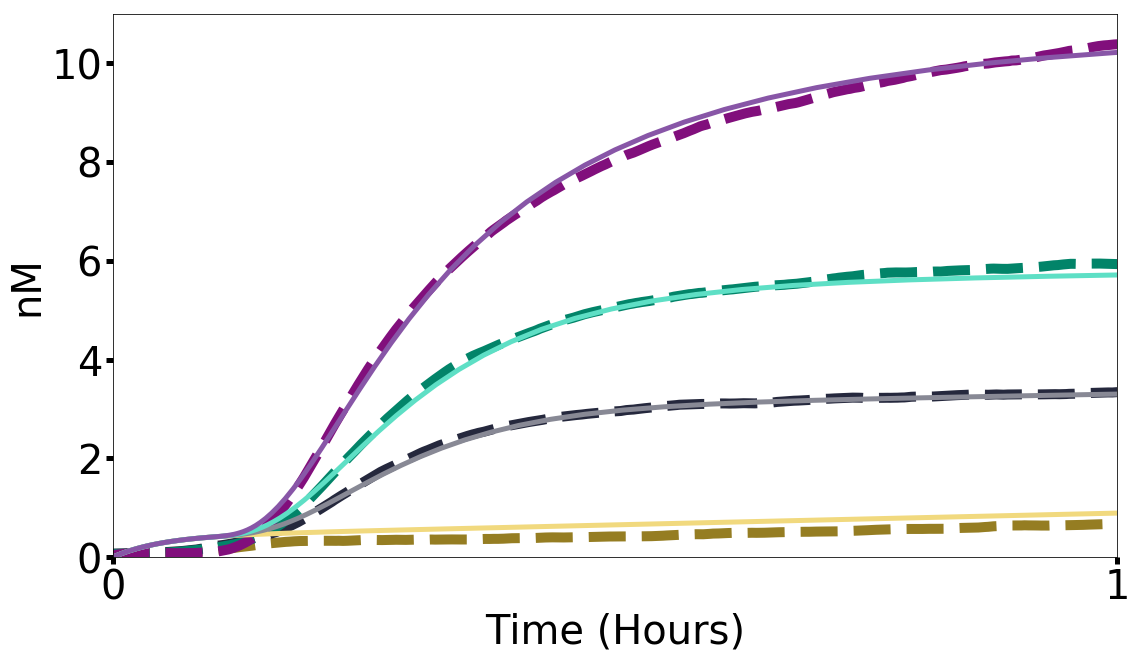

In [13]:
my_colors = ['#957D22','#25283D','#028469','#810f7c']
ax = smooth_df.plot(x = "time", linestyle = '--', linewidth = 10, color = my_colors,figsize=(18, 10),fontsize = 40)
#ax.set_ylim([0,10])
#ax.axis([0,4.0,0,10])

sweep_0.plot(ax=ax, x = "Time",linestyle='-', color='#F1D97E', linewidth=5)
sweep_25.plot(ax=ax, x = "Time",linestyle='-', color='#888995', linewidth=5)
sweep_50.plot(ax=ax, x = "Time",linestyle='-', color='#5EDFC5', linewidth=5)
sweep_1.plot(ax=ax, x = "Time",linestyle='-', color='#8856a7', linewidth=5)
ax.axis([0,1,0,11])
plt.xlabel('Time (Hours)', fontsize = 40)
plt.ylabel('nM', fontsize = 40)
plt.xticks(np.arange(0, 2, 1.0))
ax.xaxis.set_tick_params(width=5, size = 7, labelsize = 40)
ax.yaxis.set_tick_params(width=5, size = 7, labelsize = 40)
ax.legend_.remove()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='Input', loc='upper left')

In [14]:
params = pd.read_csv("/Users/Sundipta/Documents/DNA Research/Papers_Submitted/DNA23/paper data/170127_T1/T1_slowleak.csv")

In [15]:
params.head()

,Iteration,Likelihood,noise_sigma_T1_Full0,kt,kl,T1,LeakJ,Bad
0,2000,395.882558,0.193117,0.000198,1.558110e-07,345.903671,0.014314,0.000008
1,2010,394.629515,0.193117,0.000198,1.592688e-07,347.969494,0.014267,0.000008
2,2020,391.875058,0.190125,0.000198,1.592688e-07,347.969494,0.014431,0.000008
3,2030,392.020510,0.190125,0.000198,1.585429e-07,347.969494,0.014421,0.000025
4,2040,393.269167,0.190465,0.000198,1.538112e-07,347.969494,0.014421,0.000025


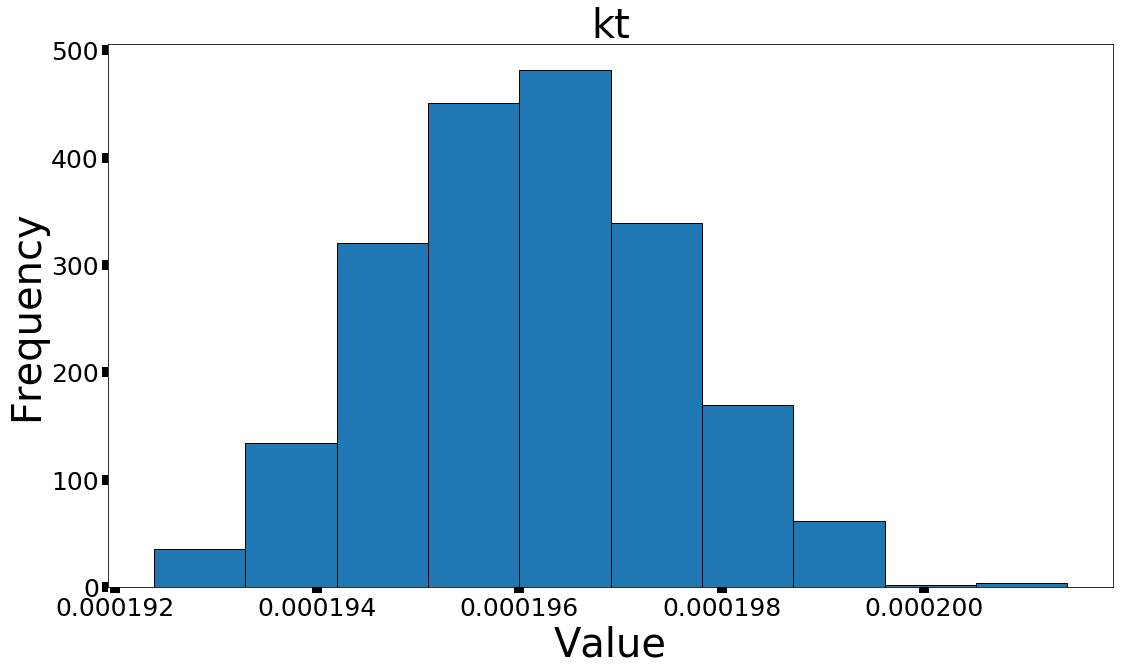

In [16]:
plt.figure(figsize=(18,10))
plt.tick_params(direction='out', length=6, width=10, colors='black',labelsize = '25')
plt.hist(params["kt"],edgecolor = "black")
plt.title("kt",fontsize = 40)
plt.xlabel("Value",fontsize = 40)
plt.ylabel("Frequency",fontsize = 40)


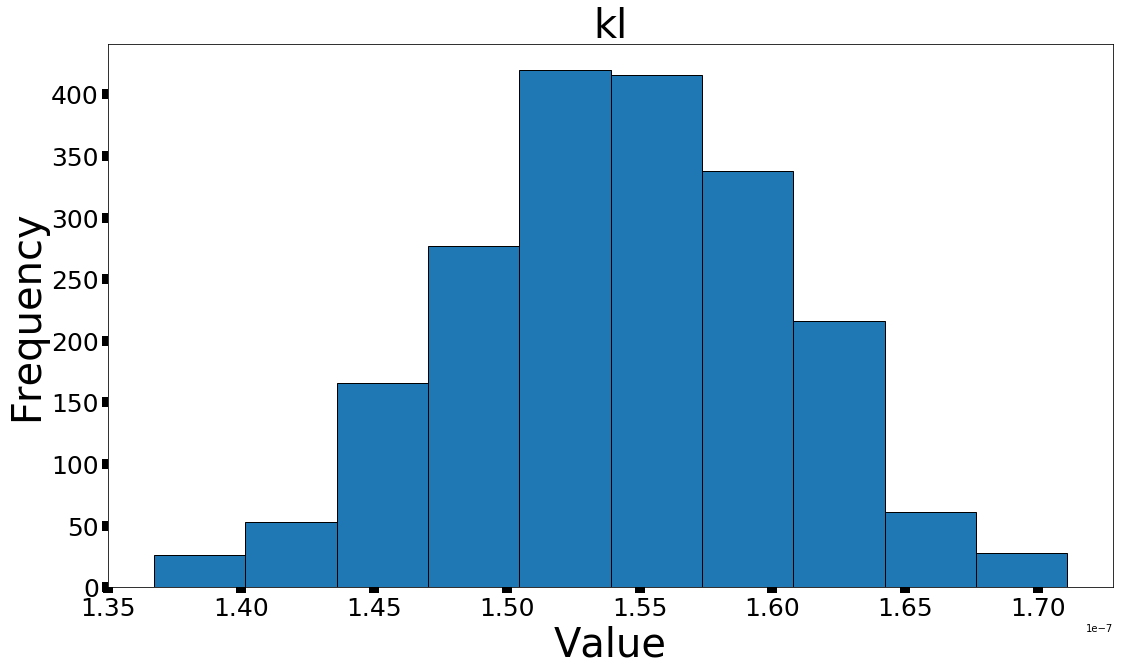

In [17]:
plt.figure(figsize=(18,10))
plt.tick_params(direction='out', length=6, width=10, colors='black',labelsize = '25')
plt.hist(params["kl"],edgecolor = "black")
plt.title("kl",fontsize = 40)
plt.xlabel("Value",fontsize = 40)
plt.ylabel("Frequency",fontsize = 40)

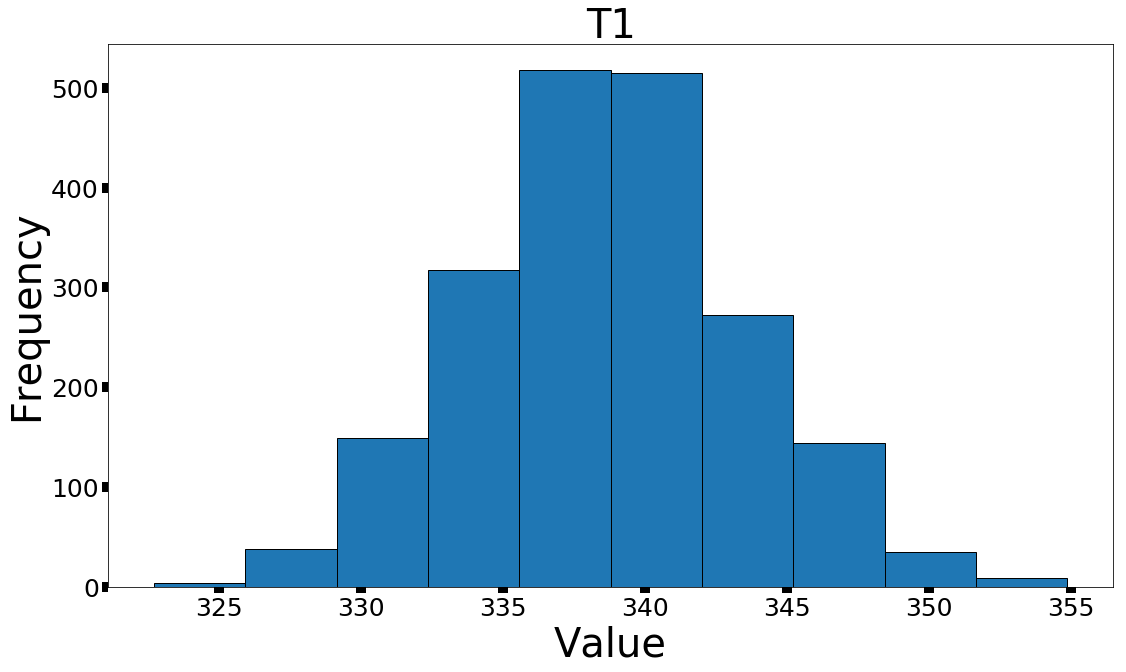

In [18]:
plt.figure(figsize=(18,10))
plt.tick_params(direction='out', length=6, width=10, colors='black',labelsize = '25')
plt.hist(params["T1"],edgecolor = "black")
plt.title("T1",fontsize = 40)
plt.xlabel("Value",fontsize = 40)
plt.ylabel("Frequency",fontsize = 40)

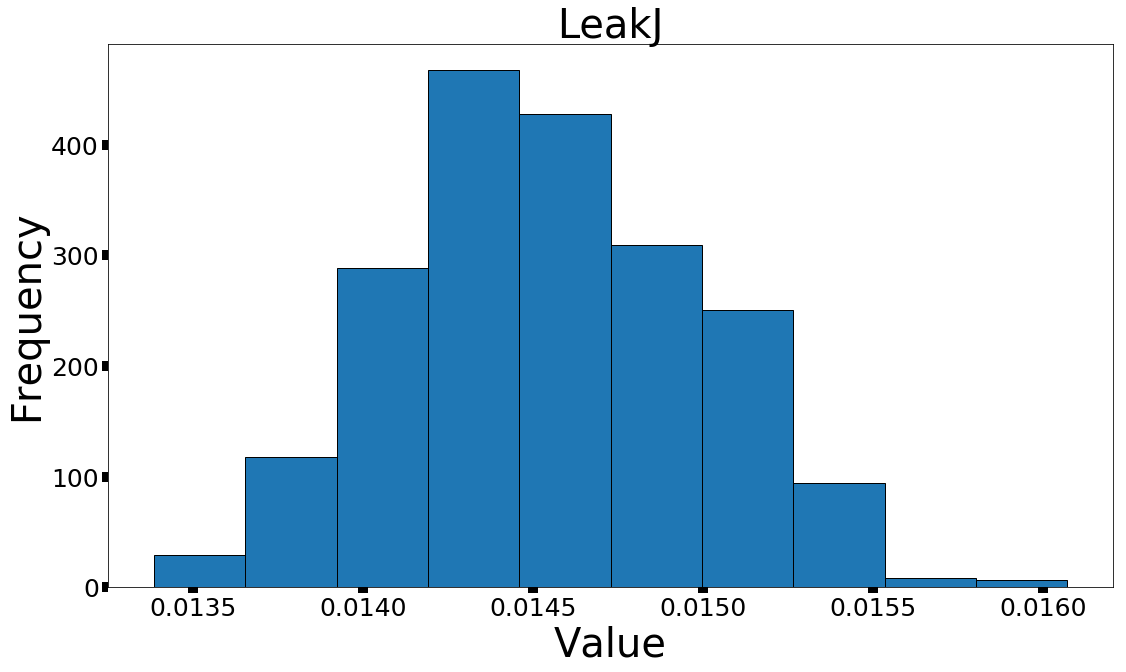

In [19]:
plt.figure(figsize=(18,10))
plt.tick_params(direction='out', length=6, width=10, colors='black',labelsize = '25')
plt.hist(params["LeakJ"],edgecolor = "black")
plt.title("LeakJ",fontsize = 40)
plt.xlabel("Value",fontsize = 40)
plt.ylabel("Frequency",fontsize = 40)

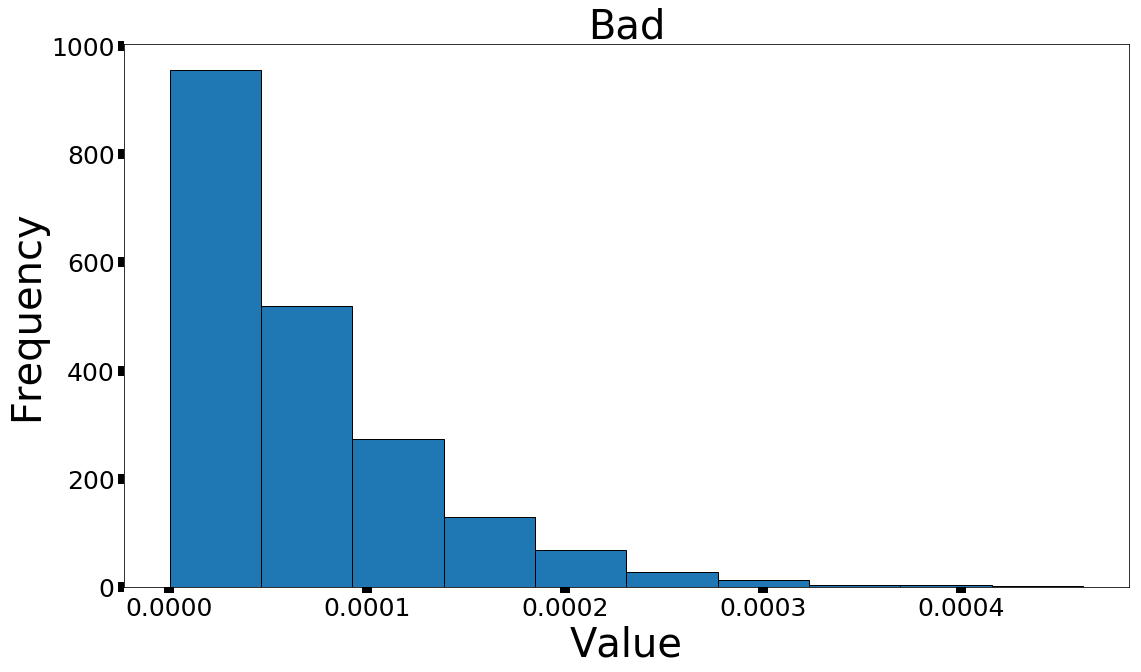

In [20]:
plt.figure(figsize=(18,10))
plt.tick_params(direction='out', length=6, width=10, colors='black',labelsize = '25')
plt.hist(params["Bad"],edgecolor = "black")
plt.title("Bad",fontsize = 40)
plt.xlabel("Value",fontsize = 40)
plt.ylabel("Frequency",fontsize = 40)